# *PREDICTION ON DIABETES*

# Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

*Reading our diabetes dataset as a pandas dataframe*

In [2]:
url='https://drive.google.com/file/d/1jZrnYurKh2hVH-BS_eLEaM3z8baMbwtD/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)
(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##**Exploratory Data Analysis**

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

Variables name in dataset

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

checking information about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


describing dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Visualization of dataset**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

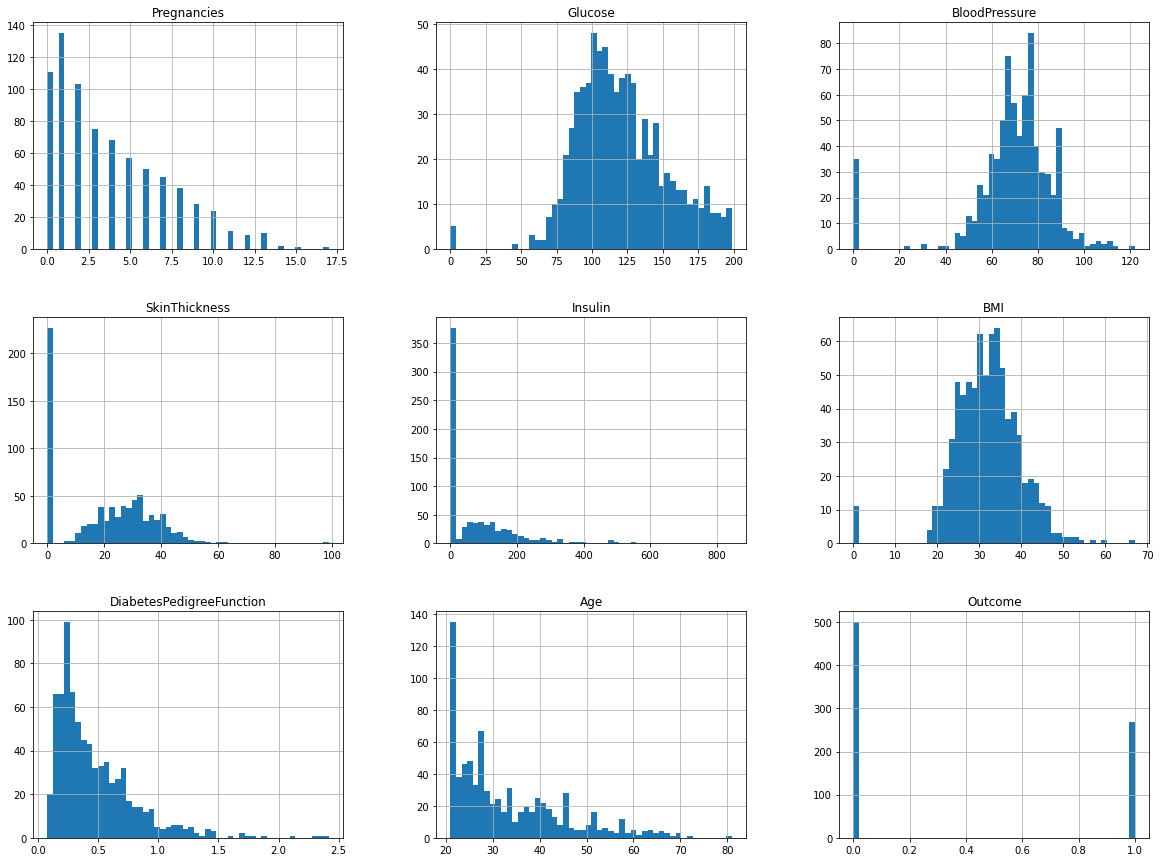

In [8]:
df.hist(bins=50, figsize=(20,15))

The classes of the outcome variable

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

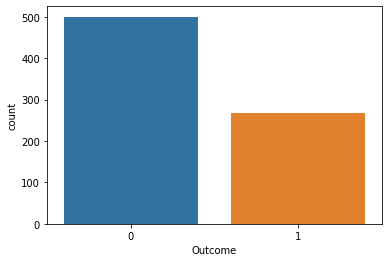

In [10]:
sns.countplot(x ='Outcome', data = df);

The distribution of the outcome variable

In [11]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

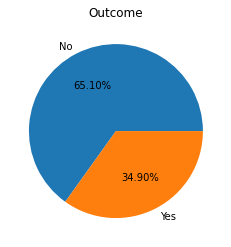

In [12]:
plt.title('Outcome')
plt.pie(df['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

DATA PREPROCESSING

## **Filling Missing Values**

Checking duplicates values in the dataset

In [13]:
df.duplicated().sum()

0

there is no duplicate values in the dataset

CHECKING NULL VALUES

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values in the dataset 

In [15]:
#finding zeros in the columns
(df[df.columns]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

These zeros are missing values of the dataset

replacing 0 values with mean

In [16]:
#filling missing values with mean
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].mean()},inplace = True)

In [17]:
#again checking zero values in the columns
(df[df.columns]==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,0,79.799479,30.1,0.349,47,1


# **Outlier Observation Analysis**

cheking outliers in variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

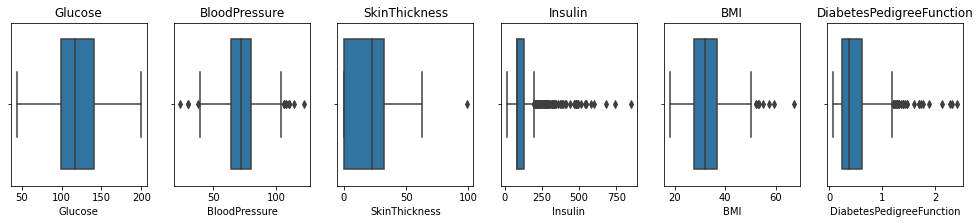

In [19]:
#checking outliers int  the datasets
fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

Outlier Treatment

In [20]:
#using IQR to prevent Outliers
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

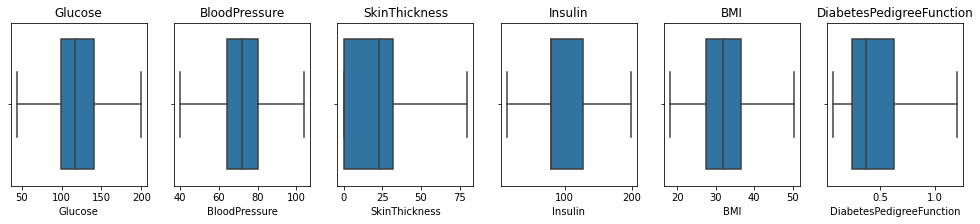

In [21]:
#after treatment of IQR 
fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

# **Checking correlation between variables**

In [22]:
#checking correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126606,0.211257,-0.084349,-0.007679,0.027144,-0.017398,0.549695,0.220392
Glucose,0.126606,1.000000,0.220946,0.071574,0.394778,0.234041,0.118236,0.268602,0.492908
BloodPressure,0.211257,0.220946,1.000000,0.026995,0.017952,0.286508,0.015067,0.334903,0.166131
SkinThickness,-0.084349,0.071574,0.026995,1.000000,0.368426,0.382756,0.177920,-0.119170,0.073125
Insulin,-0.007679,0.394778,0.017952,0.368426,1.000000,0.225814,0.180001,0.038798,0.208749
BMI,0.027144,0.234041,0.286508,0.382756,0.225814,1.000000,0.138545,0.035865,0.313035
DiabetesPedigreeFunction,-0.017398,0.118236,0.015067,0.177920,0.180001,0.138545,1.000000,0.047289,0.184969
Age,0.549695,0.268602,0.334903,-0.119170,0.038798,0.035865,0.047289,1.000000,0.242702
Outcome,0.220392,0.492908,0.166131,0.073125,0.208749,0.313035,0.184969,0.242702,1.000000


correlation of Output variable with other variables in decreasing order

In [23]:
#correlation of output variables
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.313035
Age                         0.242702
Pregnancies                 0.220392
Insulin                     0.208749
DiabetesPedigreeFunction    0.184969
BloodPressure               0.166131
SkinThickness               0.073125
Name: Outcome, dtype: float64

In [71]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [72]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [73]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))


In [74]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,...,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewGlucose,NewInsulinScore,NewBMI
0,6.0,148.0,72.0,35.0,79.799479,33.6,0.627,50.0,1,1,...,0,0,1,0,0,0,1,High,Normal,Obesity 1
1,1.0,85.0,66.0,29.0,79.799479,26.6,0.351,31.0,0,0,...,1,0,1,0,1,0,0,Normal,Normal,Overweight
2,8.0,183.0,64.0,0.0,79.799479,23.3,0.672,32.0,1,0,...,0,0,1,0,0,0,1,High,Normal,Normal
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,0,...,1,0,1,0,1,0,0,Normal,Normal,Overweight
4,0.0,137.0,40.0,35.0,168.000000,43.1,1.200,33.0,1,0,...,0,0,0,0,0,0,1,High,Abnormal,Obesity 3


## **One Hot Encoding**

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [75]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [78]:
df.shape

(768, 28)

In [76]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,...,NewGlucose_Secret,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,148.0,72.0,35.0,79.799479,33.6,0.627,50.0,1,1,...,1,1,0,0,0,0,1,0,0,0
1,1.0,85.0,66.0,29.0,79.799479,26.6,0.351,31.0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,8.0,183.0,64.0,0.0,79.799479,23.3,0.672,32.0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,1.200,33.0,1,0,...,1,0,0,1,0,0,0,0,0,0


Heatmap of correlation

Text(0.5, 1.0, 'correlation of feature')

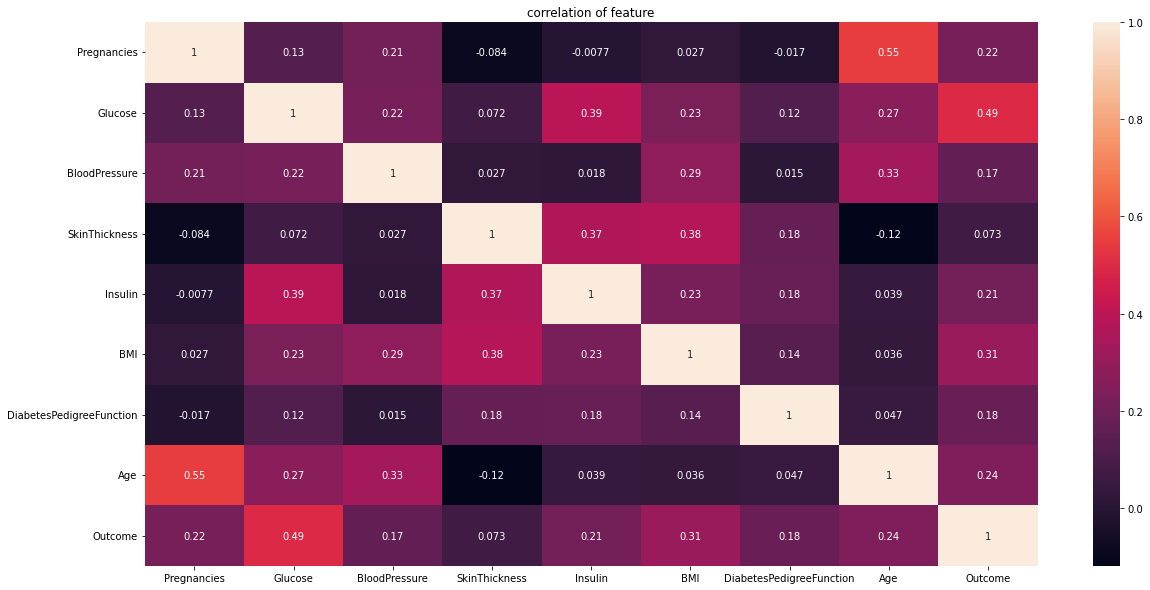

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

By Observing Outcome Ratios of Correlation: Features Predominant - BMI, Age, Pregnancies (External Factors) Glucose, Insulin(Internal Factors) -- Descending Order Features Not Critical - Skin Thickness, Blood Pressure Conclusions Drawn: Keep your BMI in check to avoid High levels of Glucose and Insulin. Keep your Glucose and Insulin levels in check as age progresses. Pregnant Ladies, also shoul keep a close watch on their Glucose and Insulin Levels

Pairplot of dataset - variables relation with Outcome

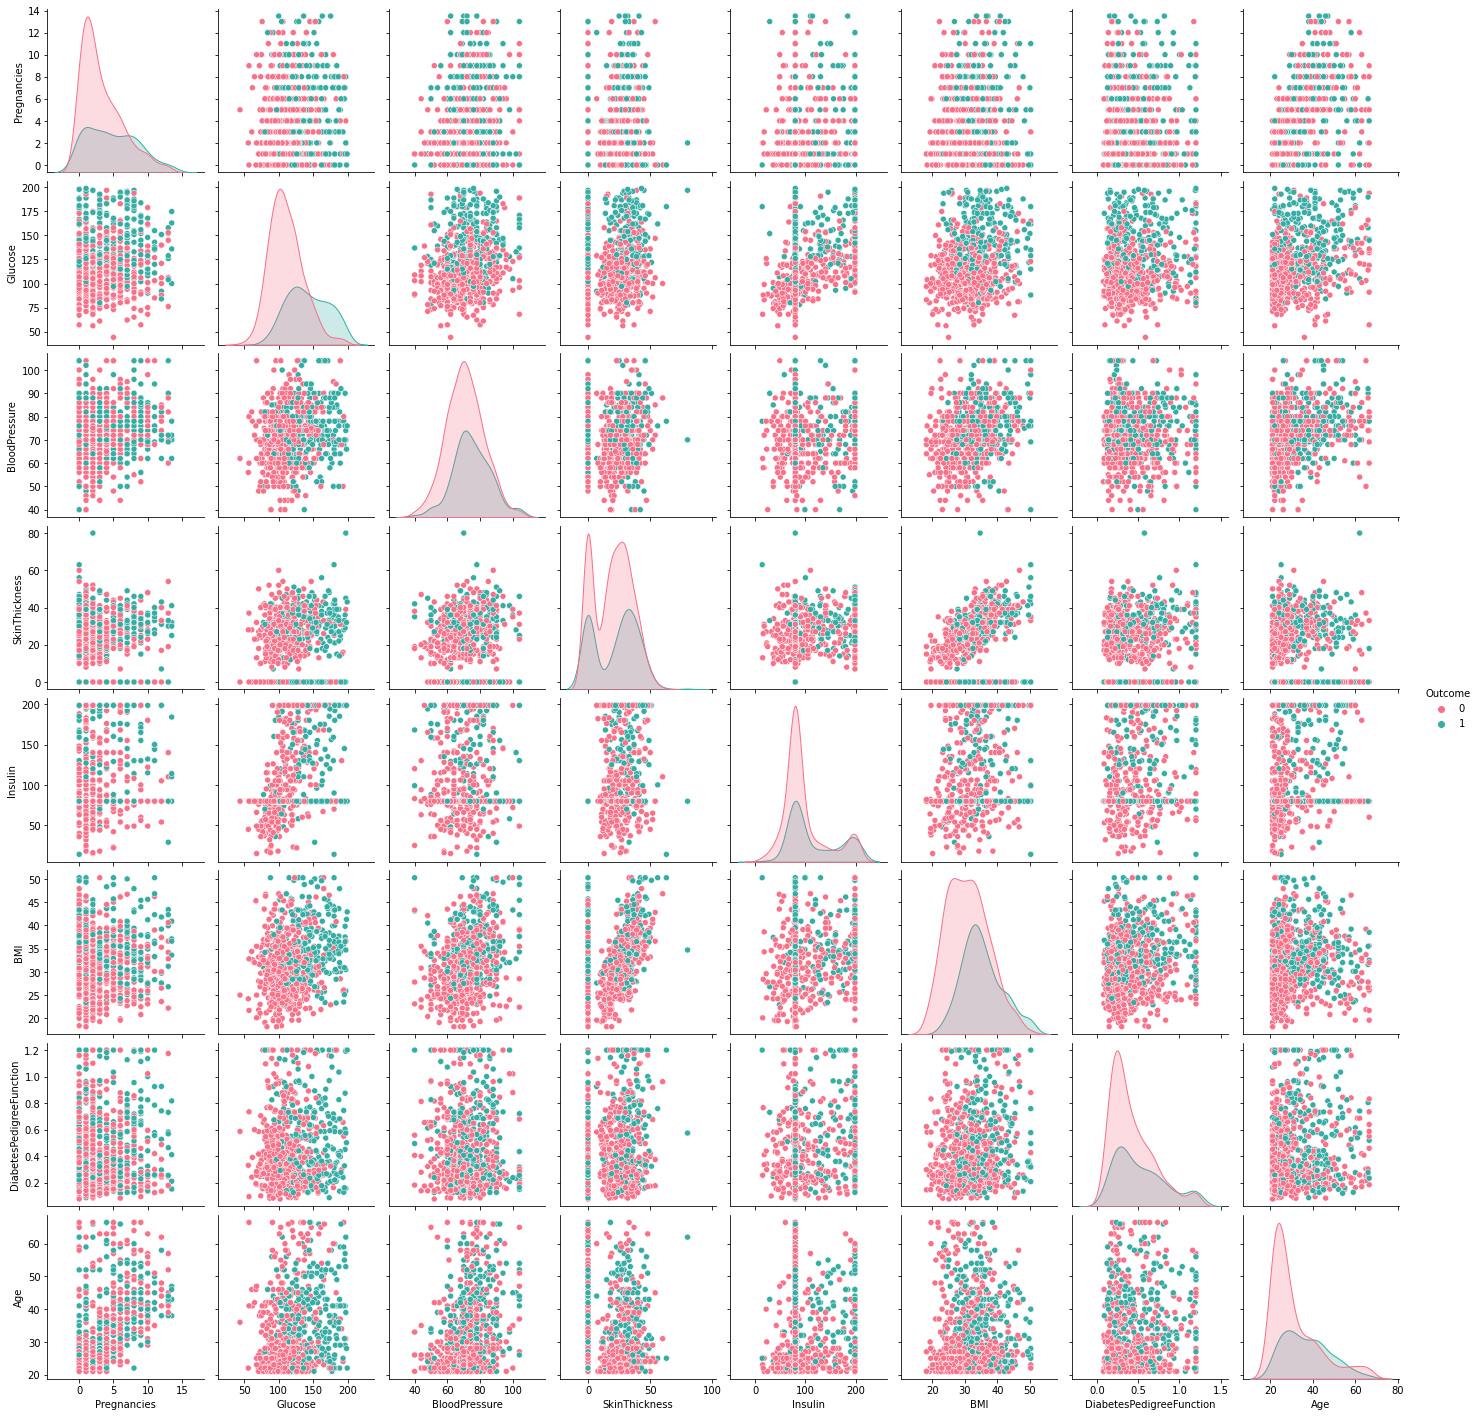

In [25]:
sns.pairplot(df, hue='Outcome', palette="husl")

result:

1.high Glucose level in pregnanci increase the risk of diabetes.

2.BMI Above 30 and high level of Glucose togather increase the risk of diabetes.

3.we can see here that increasing Glucose level is the key factor which increase the risk of diabetes.

4.High Glucose level along with other variables increase the risk of diabetes.

## **Histplot of dataset - variables relation with Outcome**

In [26]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


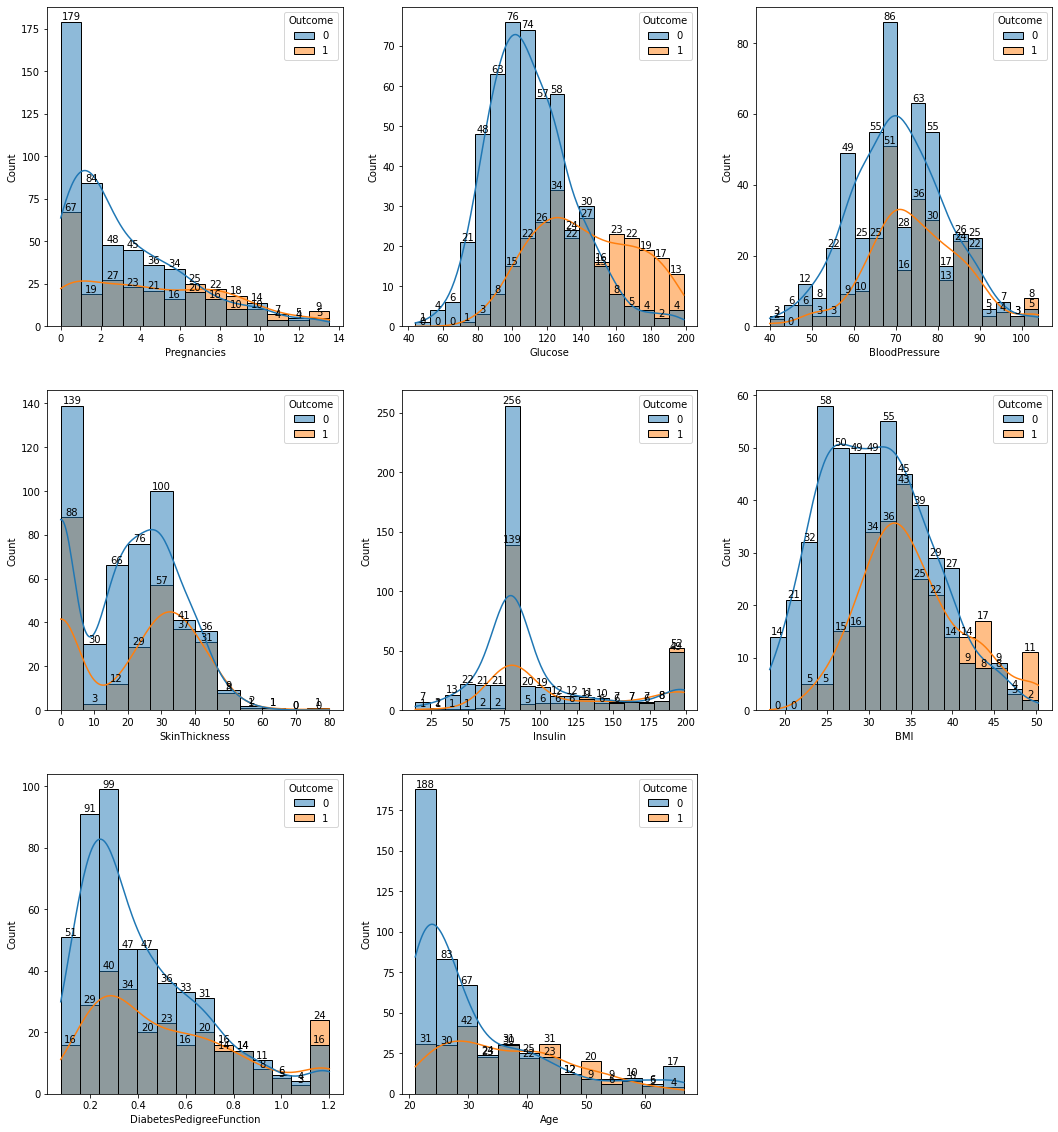

In [30]:
pno = 1
plt.figure(figsize=(18,20))
for i in df.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            Axes = sns.histplot(data = df , x = i , hue = df.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in Axes.containers:     #to set a label on top of the bars.
                Axes.bar_label(i,)


result:

1.when the number of pregnancies increases the risk of diabetes also increase.

2.when the level of Glucose increase above 140 the risk of diabetes also increase.

3.blood pressure between 60 to 90 have more diabetic people then other rate.

4.risk of diabetes increase when skin thickness increase.

5.insulin level affect diabetes when its level increase the risk of diabetes also increase.

6.when BMI increase above 30 the risk of diabetes also increase.

7.risk of diabetes increase when age increase.

## **Normalization**

In [93]:
#using standardscaler to normalizes the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(df)

print(standardized_data)

[[ 0.64714967  0.86527574 -0.01931497 ... -0.12054478 -0.55529049
  -0.77459667]
 [-0.84896998 -1.20598931 -0.53173732 ... -0.12054478  1.80085922
  -0.77459667]
 [ 1.24559754  2.01597855 -0.70254478 ... -0.12054478 -0.55529049
  -0.77459667]
 ...
 [ 0.34792574 -0.02240928 -0.01931497 ... -0.12054478 -0.55529049
   1.29099445]
 [-0.84896998  0.14197684 -1.04415968 ... -0.12054478 -0.55529049
   1.29099445]
 [-0.84896998 -0.94297153 -0.19012242 ... -0.12054478  1.80085922
  -0.77459667]]


# **Using KNN Algorithm**

In [94]:
#library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [150]:
#split data set
#x=df.iloc[:,0:8]
colu=["Glucose","Insulin","BloodPressure","Pregnancies","BMI"]
#X=df.loc[:,0:]
X= df.drop(columns=['Outcome'])
#Y=df.iloc[:,8]
Y=df["Outcome"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=123,test_size=0.02) 

In [151]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((752, 27), (16, 27), (752,), (16,))

In [152]:
#standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
#classifier
classifier = KNeighborsClassifier(n_neighbors=13)

In [155]:
#fit model
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [156]:
#evaluate
Y_pred = classifier.predict(X_test)

In [157]:
#confusion matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)
print(conf_matrix)
print(f1_score(Y_test,Y_pred))

[[8 1]
 [1 6]]
0.8571428571428571


In [158]:
#testing
print(accuracy_score(Y_test,Y_pred))

0.875


In [ ]:
#save model
import pickle

In [ ]:
saved_model = pickle.dumps(classifier)
classifier_from_pickle = pickle.loads(saved_model)
classifier_from_pickle.predict(X_test)


In [ ]:
df.head()

In [ ]:
#testing
classifier.predict([[0,137,40,35,168,43.1,2.228,33]])

In [ ]:
#import adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#divide into test and train sets
train_X,test_X,train_Y,test_Y = train_test_split(X,Y, random_state=10 , stratify=Y)

In [ ]:
#creating an adaboost instance
clf=AdaBoostClassifier(random_state=96)

In [ ]:
#fit model
clf.fit(train_X,train_Y)

In [ ]:
#score
clf.score(train_X,train_Y)

In [ ]:
#score test
clf.score(test_X,test_Y)